In [9]:
import sys
import os

current_dir = os.path.dirname(os.path.abspath(''))
others_path = os.path.join(current_dir, '..', 'gpr')

others_path = os.path.abspath(others_path)
if others_path not in sys.path:
    sys.path.append(others_path)


import numpy as np
import matplotlib.pyplot as plt
from pqcd.pQCD import pQCD


from pathlib import Path
notebook_dir = Path.cwd()


In [10]:
n_end = 30

samples_dir = notebook_dir.parent.parent / f'results/eos_samples/archive/{n_end}ns_constraining_eos.npy'
x_hat_dir = notebook_dir.parent.parent / f'results/eos_samples/archive/{n_end}ns_constraining_renormscale.npy'
samples = np.load(samples_dir)

X_hats = np.load(x_hat_dir)
edens = samples[0]/1000 #GeV/fm^-3
prezzes = samples[1]/1000 #GeV/fm^-3

weights = np.array([int(pQCD(np.exp(X_hat)).constraints(e0=eden[-1], p0=prezz[-1], n0=n_end*0.16))
                    for X_hat, eden, prezz in zip(X_hats, edens, prezzes)])

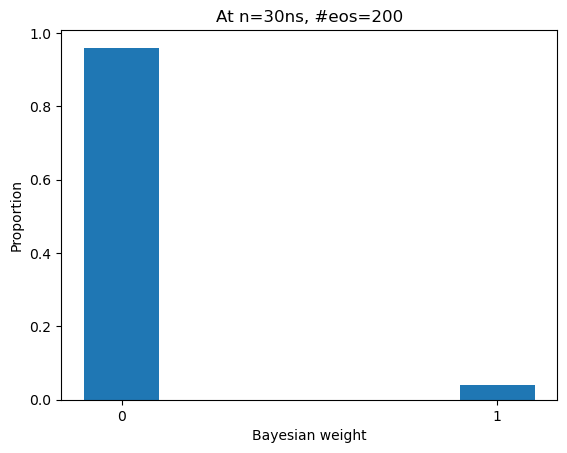

In [33]:
num_sets = len(edens)

hist, bins = np.histogram(weights, bins=[-0.1,0.1,0.9,1.1])
hist = hist / len(weights) 

plt.hist(bins[:-1], bins, weights=hist)
plt.xlabel('Bayesian weight')
plt.ylabel('Proportion')
plt.title(f'At n={n_end}ns, #eos={num_sets}')
plt.xticks([0, 1])
plt.show()

In [34]:
hist

array([0.96, 0.  , 0.04])

In [150]:
num_sets = len(edens)
weights = []

for i in range(len(edens)):
    pQCDX = pQCD(np.exp(X_hats[i]))
    weights.append(int(pQCDX.constraints(e0=edens[i][-1], p0=prezzes[i][-1], n0=n_end*0.16)))

In [106]:
N = 1000
num_sets = len(edens)
weights = []

for n in range(num_sets):
    weight_indiv_eos = np.zeros(N)
    for i in range(N):
        X = np.random.uniform(np.log(1/2), np.log(2))  # Log-linear distribution
        pQCDX = pQCD(np.exp(X))  # Redefine class with new X
        weight_indiv_eos[i] = int(pQCDX.constraints(e0=edens[n][-1], p0=prezzes[n][-1], n0=n_end*0.16))
    weights.append(weight_indiv_eos.mean())

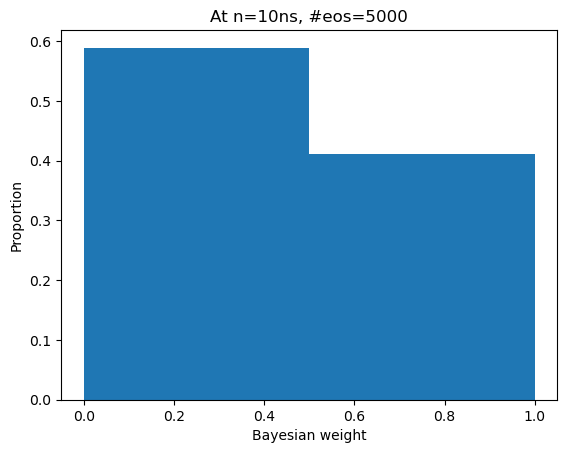

In [153]:
hist, bins = np.histogram(weights, bins=[0,0.5,1])
hist = hist / len(weights) 

plt.hist(bins[:-1], bins, weights=hist)
plt.xlabel('Bayesian weight')
plt.ylabel('Proportion')
plt.title(f'At n={n_end}ns, #eos={len(edens)}')
plt.show()